In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import peak_widths, find_peaks
import warnings
import os
import sys
import pandas as pd

# Задание 1
В первом задании получено изображение спектра поглощения естественной смеси Rb при помощи осциллографа. Осциллограмма приведена ниже Из полученных данных найдены значения амплитуды поглощения для спектральных линий $D_1, D_2$ естественной смеси рубидия

In [2]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f0.CSV'))
freq =  data.iloc[:, 3].to_numpy()
freq = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

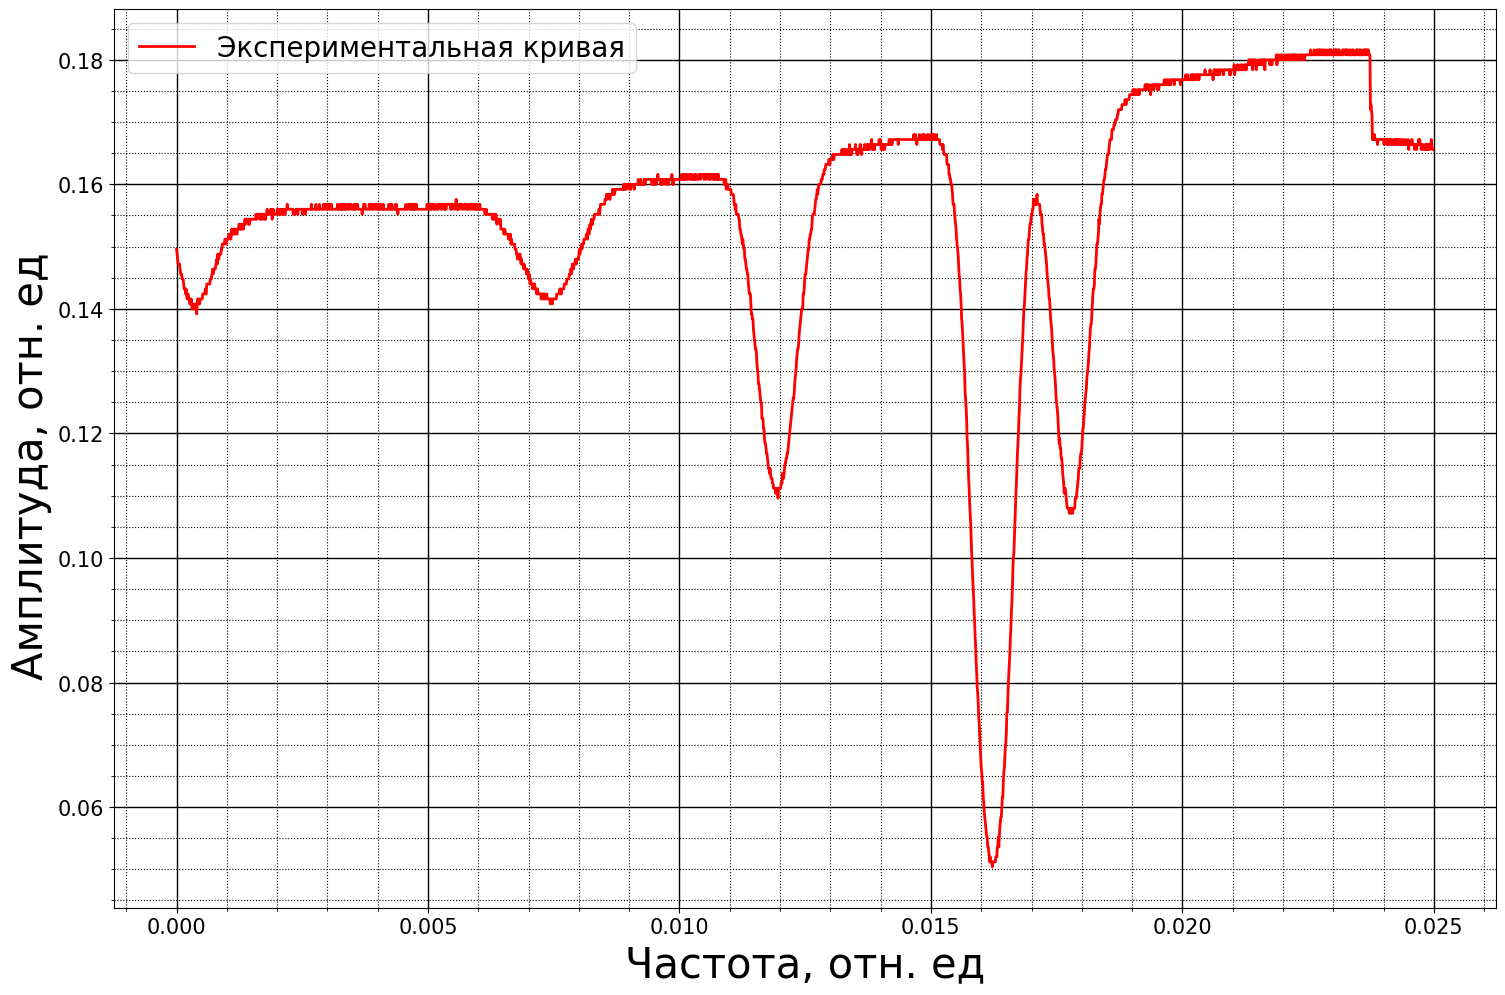

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(freq,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Частота, отн. ед',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_1.png'))

Определять глубину пиков в автоматическом режиме в данном случае ну очень неприятно и долго, поэтому придётся сделать это ручками, мой глаз определил, что амплитуда поглощения равна 

In [4]:
print('Пик 1 Rb_87 низкочастотная = ', 0.020 )
print('Пик 2 Rb_85 низкочастотная = ', 0.055)
print('Пик 3 Rb_85 высокочастотная = ', 0.12)
print('Пик 4 Rb_87 высокочастотная = ', 0.65)

Пик 1 Rb_87 низкочастотная =  0.02
Пик 2 Rb_85 низкочастотная =  0.055
Пик 3 Rb_85 высокочастотная =  0.12
Пик 4 Rb_87 высокочастотная =  0.65


Самая большая погрешность в данном случае - это будет погрешность отсчёта на графике, поэтому возьмём  как погрешность $\Delta amp $ половину цены деления чтоб наверняка 

In [5]:
#Округлённая до первой значащей цифры 0.0025
D_amp =  0.003

# Задание 2
Во втором задании наблюдались линии поглощения естественной смеси рубидия. Для этого регистрировался пробный лазерный пучок, прошедший через ячейку, содержащую смесь, в присутствии встречного насыщающего поля. На основании полученных данных оценены изотопические сдвиги для Rb87 и Rb85.


In [6]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f1.CSV'))
time =  data.iloc[:, 3].to_numpy()
time = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

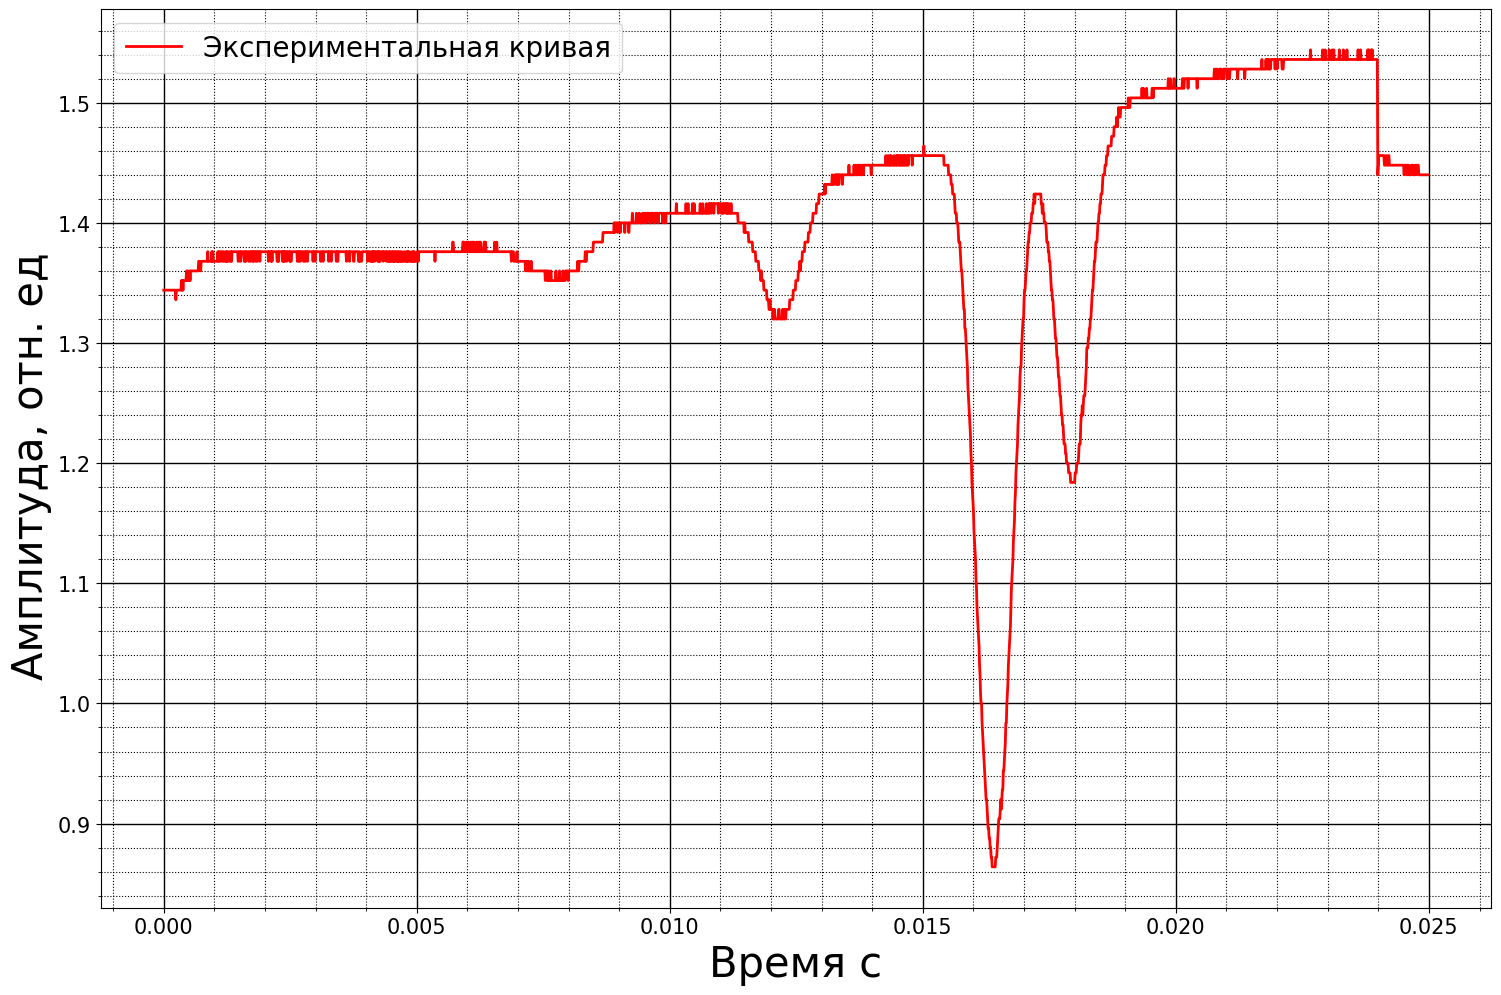

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Время с',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

Мы знаем, что расстояние в частотах между низкочастотной и высокочастотной компонентами Rb_87, поэтому задача определить коэффициент пересчёта времени в частоты 


Для этого нужно инвертировать картинку, чтобы использовать функцию find_peaks
border1,2 - границы для поиска максимумов выбрать самостоятельно, глядя на график ниже, должны найтись 4 пика.Кроме того, необходимо варьировать другие параметры.

In [8]:
border_1 = 0.7
border_2 = 1.2
peaks_idx, prop = find_peaks(1/amp, height=(border_1, border_2),  prominence=0.01, distance=50)

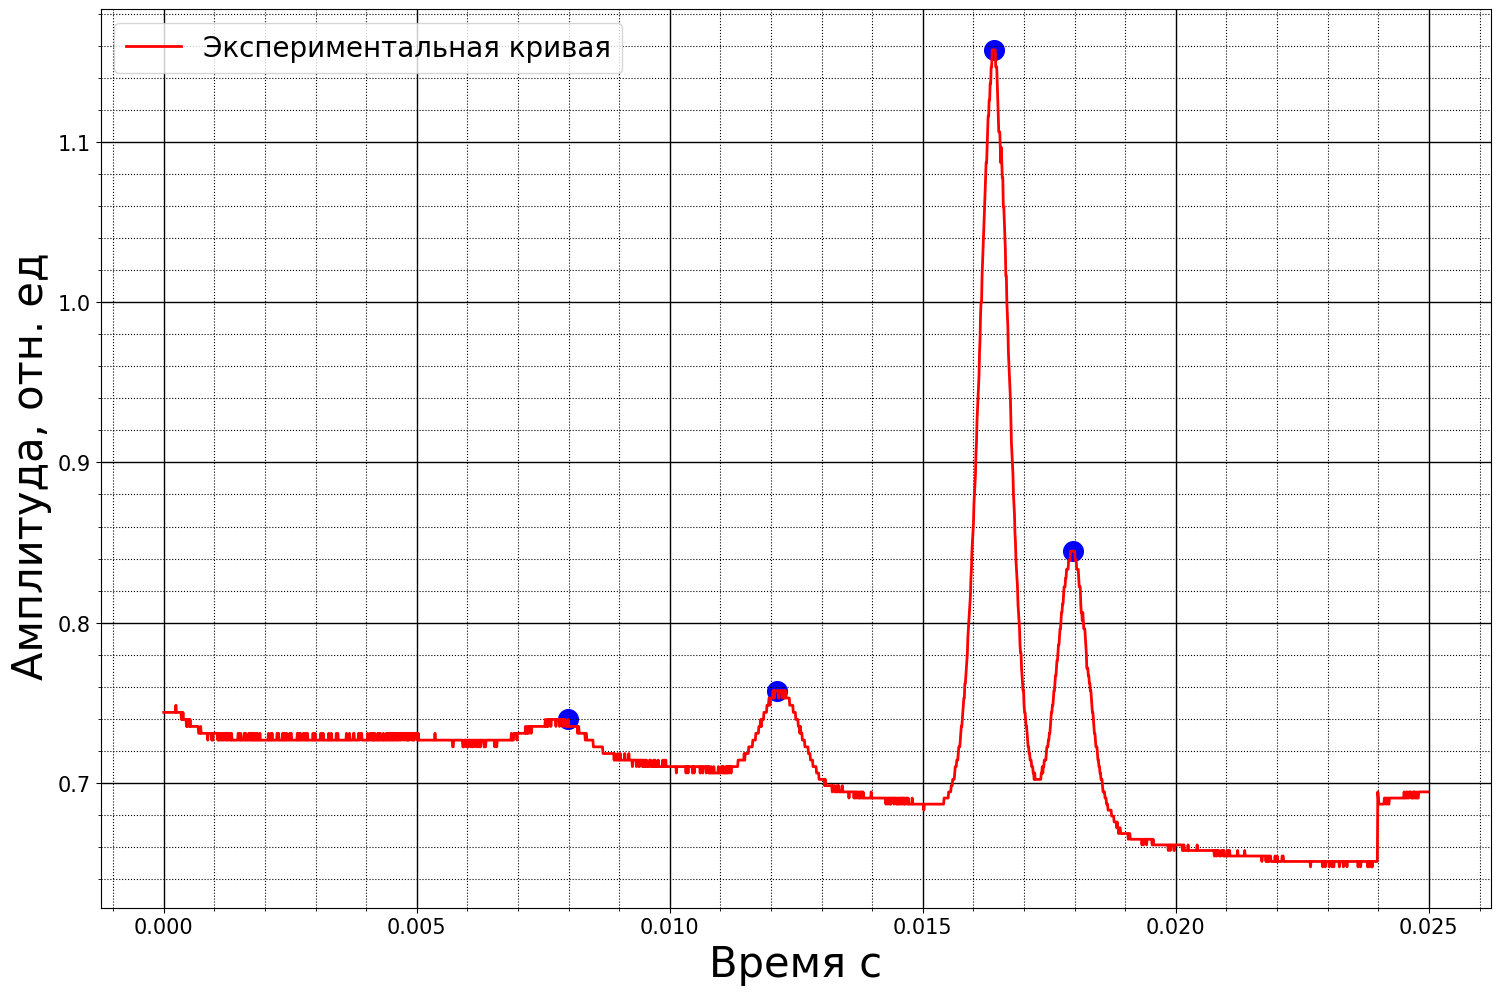

In [9]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  1/amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            1/amp[peaks_idx],
            color="b", s=200, marker='o' 
            )

ax.set_xlabel('Время с',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')


Между крайней правой(высокочастотная линия $Rb_{87}$) и крайней левой (низкочастотная линия $Rb_{87}$) частота $\nu_{st} = 6835 МГц$, а время между ними обозначим за $t_{st}$ тогда из пропорции $\frac{\nu_{st}}{\nu} = \frac{t_{st}}{t} \Rightarrow \nu = \frac{\nu_{st}}{t_{st}}\cdot t$ находим перестроичный коэффициент для произольного промежутка времени  t 

In [10]:
nu_st = 6835*1e+6
t_st = time[peaks_idx][3] - time[peaks_idx][0]
coeff = nu_st / t_st
print(coeff)

685556670010.0302


Перевернём картинку назад для построения нормального графика 

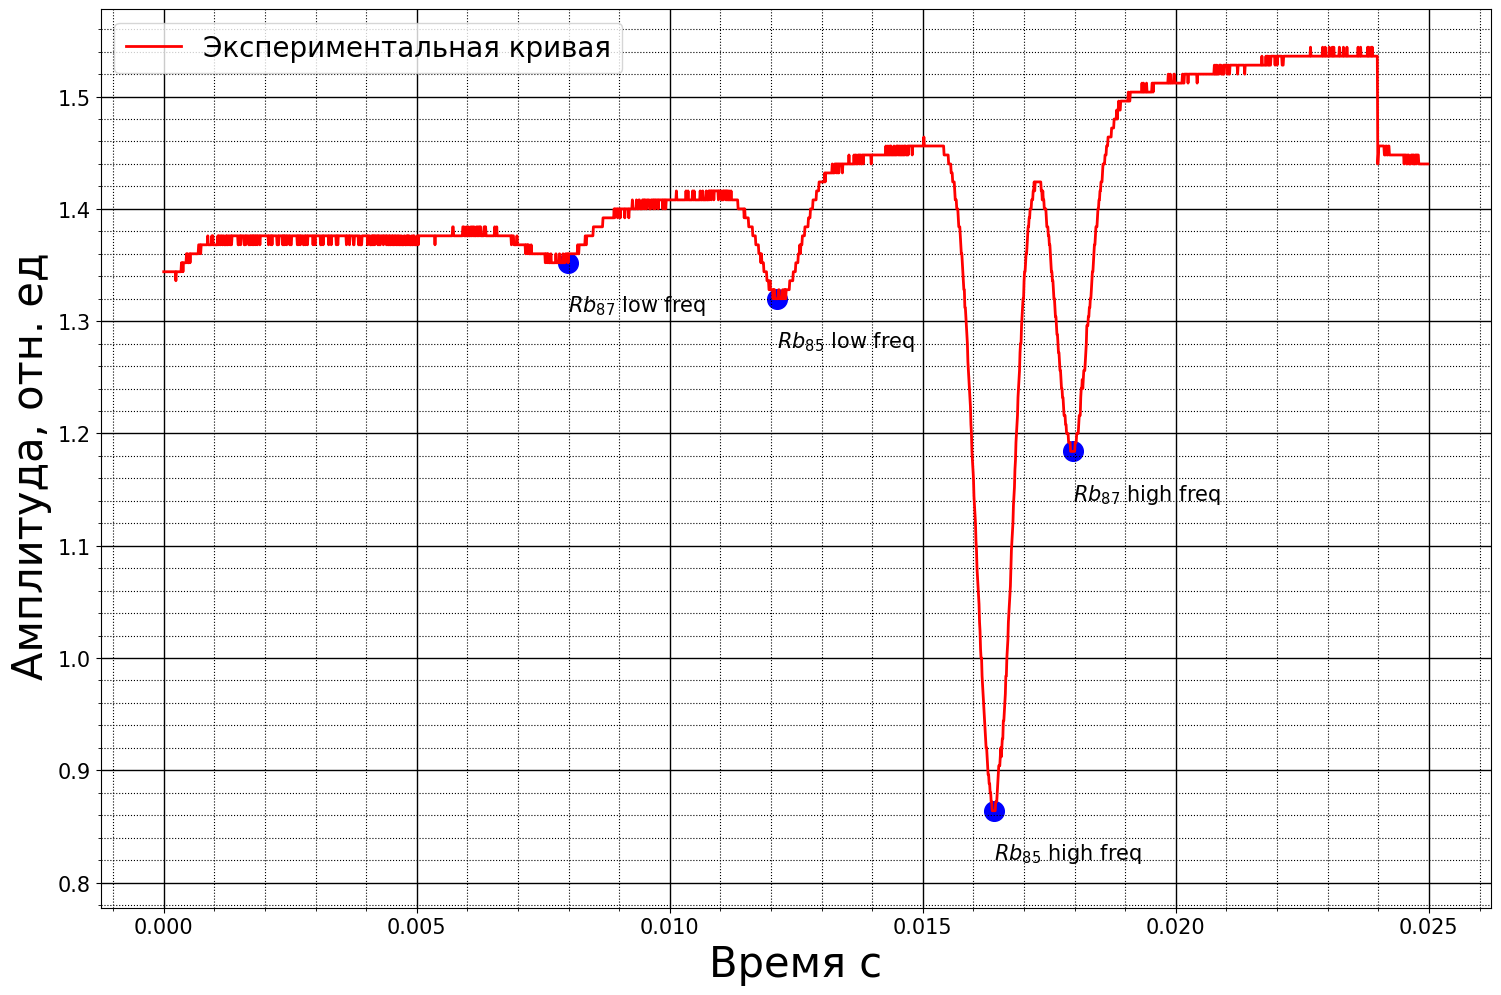

In [11]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="b", s=200, marker='o' 
            )

ax.set_xlabel('Время с',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.min(amp[peaks_idx]) * 0.05
ax.set_ylim(np.min(amp[peaks_idx]) - np.min(amp[peaks_idx]) * 0.1)
ax.text(time[peaks_idx][0], amp[peaks_idx][0] - shift,  r"$Rb_{87}$ low freq", fontsize=15)
ax.text(time[peaks_idx][1], amp[peaks_idx][1] - shift,  r"$Rb_{85}$ low freq", fontsize=15)
ax.text(time[peaks_idx][2], amp[peaks_idx][2] - shift,  r"$Rb_{85}$ high freq", fontsize=15)
ax.text(time[peaks_idx][3], amp[peaks_idx][3] - shift,  r"$Rb_{87}$ high freq", fontsize=15)
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_2.png'))

Тогда, используя коэффициент перестройки определим частотное расстояние между высокочастотными компонентами изотопов и между низкочастотными будет равно: 

In [12]:
high_dist = (time[peaks_idx][3] - time[peaks_idx][2])*coeff
print("Расстояние между высокочастотными компонентами = MГц ", high_dist*1e-6 )
low_dist = (time[peaks_idx][1] - time[peaks_idx][0])*coeff
print("Расстояние между низкочастотными компонентами = MГц ", low_dist*1e-6 )

Расстояние между высокочастотными компонентами = MГц  1069.4684052156485
Расстояние между низкочастотными компонентами = MГц  2824.4934804413233


# Задание 3
В третьем задании исследовалась низкочастотная компонента D2 линии Rb87. Полученные без синхронного детектора внутридоплеровские  и перекрёстные резонансы низкочастотной компоненты D2 линии Rb87 приведены на графике ниже

In [13]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f2.CSV'))
time =  data.iloc[:, 3].to_numpy()
time = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

Чтобы корректно подписать все пики в автоматическом режиме необходимо снаяала их найти. Их должно быть 6 штук. Изменяя параметры функции find_peaks - найти их. Причём необходимо отсечь ложные пики просто начав поиск чуть левее или правее 

In [14]:
print(len(time))
time = time[800:2200]
amp = amp[800:2200]

2499


In [15]:
border_1 = 0.025
border_2 = 1.2
peaks_idx, prop = find_peaks(amp, height=(border_1, border_2), prominence=0.00015, distance=70)

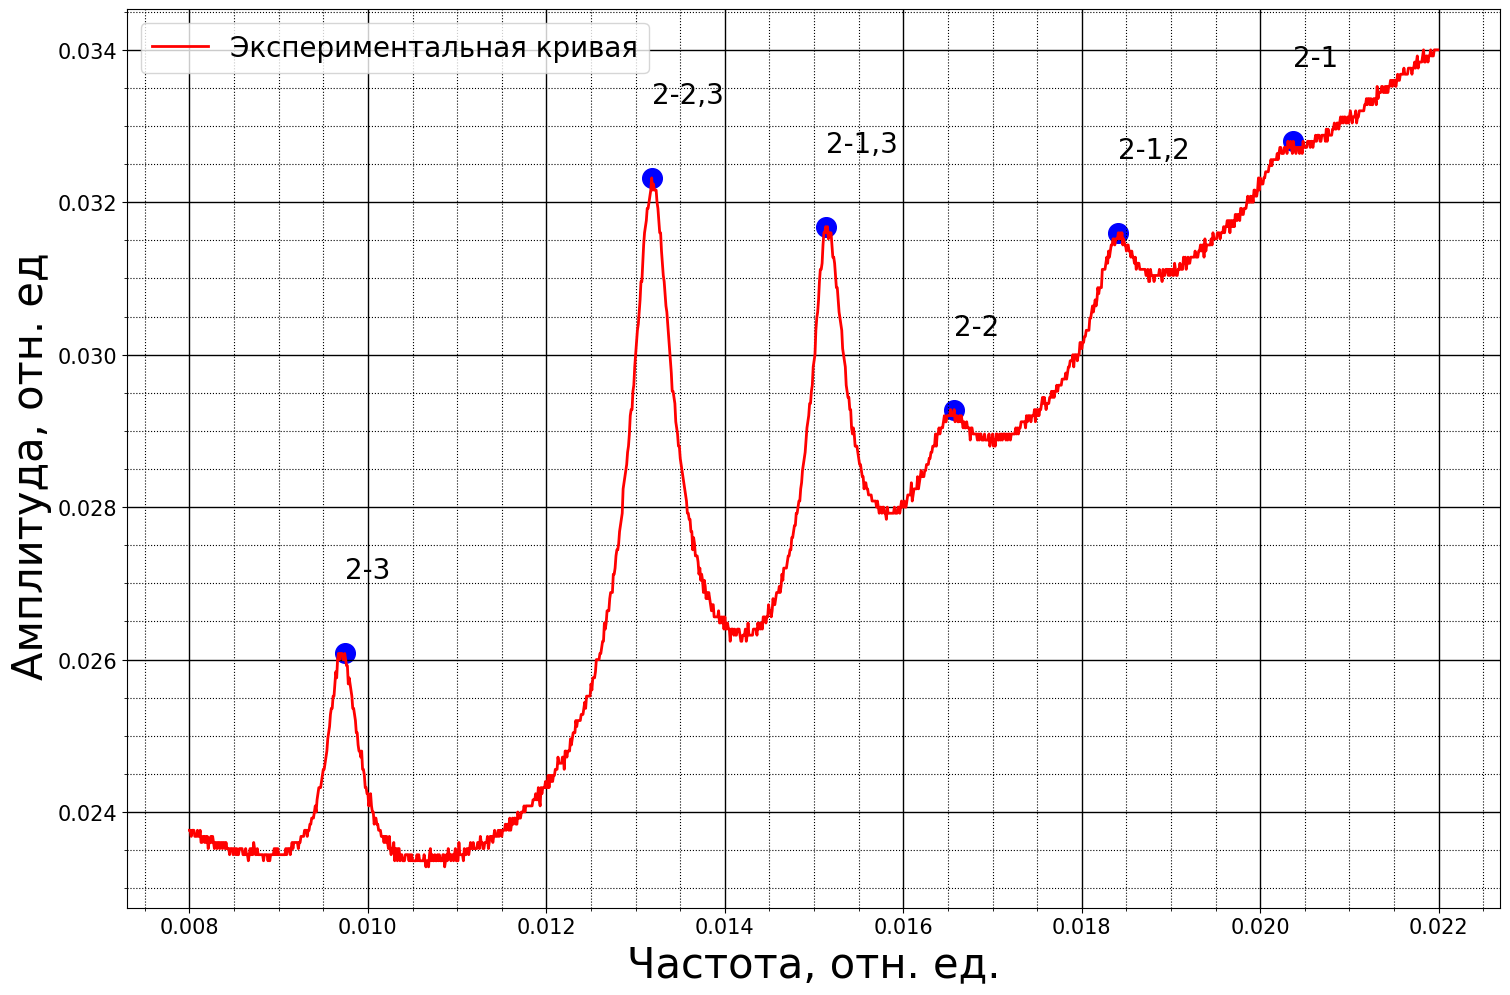

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="b", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03
# ax.set_ylim(np.min(amp[peaks_idx]) - np.min(amp[peaks_idx]) * 0.1)
ax.text(time[peaks_idx][0], amp[peaks_idx][0] + shift,  "2-3", fontsize=20)
ax.text(time[peaks_idx][1], amp[peaks_idx][1] + shift,  "2-2,3", fontsize=20)
ax.text(time[peaks_idx][2], amp[peaks_idx][2] + shift,  "2-1,3", fontsize=20)
ax.text(time[peaks_idx][3], amp[peaks_idx][3] + shift,  "2-2", fontsize=20)
ax.text(time[peaks_idx][4], amp[peaks_idx][4] + shift,  "2-1,2", fontsize=20)
ax.text(time[peaks_idx][5], amp[peaks_idx][5] + shift,  "2-1", fontsize=20)
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_3.png'))

# Задание 4
В задании 4 измерены ширины внутридоплеровских резонансов при различной интенсивности насыщающего пучка. Интенсивность менялась с помощью светофильтров. С помощью синхронного детектора были записаны спектры внутридоплеровских резонансов: без использования светофильтров и с двумя различными наборами светофильтров (интенсивность насыщающего пучка при использовании набора №2 ниже, чем при использовании набора №1). Осциллограммы приведены на рисунках ниже

Чтобы измерить ширины  пиков их сначала нужно найти, аналогичено пользуясь сначала пристрелочным графиком, ограничим нужную нам область и найдём 6 пиков  

In [17]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f3.CSV'))
time =  data.iloc[:, 3].to_numpy()
time = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

In [18]:
print(len(time))
time = time[300:1600]*1e+3
amp = amp[300:1600]*1e+2

2499


In [19]:
peaks_idx, prop = find_peaks(amp,  prominence=0.4, distance=70)
p_wds, wds_hights,left_ips, right_ips = peak_widths(amp, peaks_idx, rel_height=0.5)

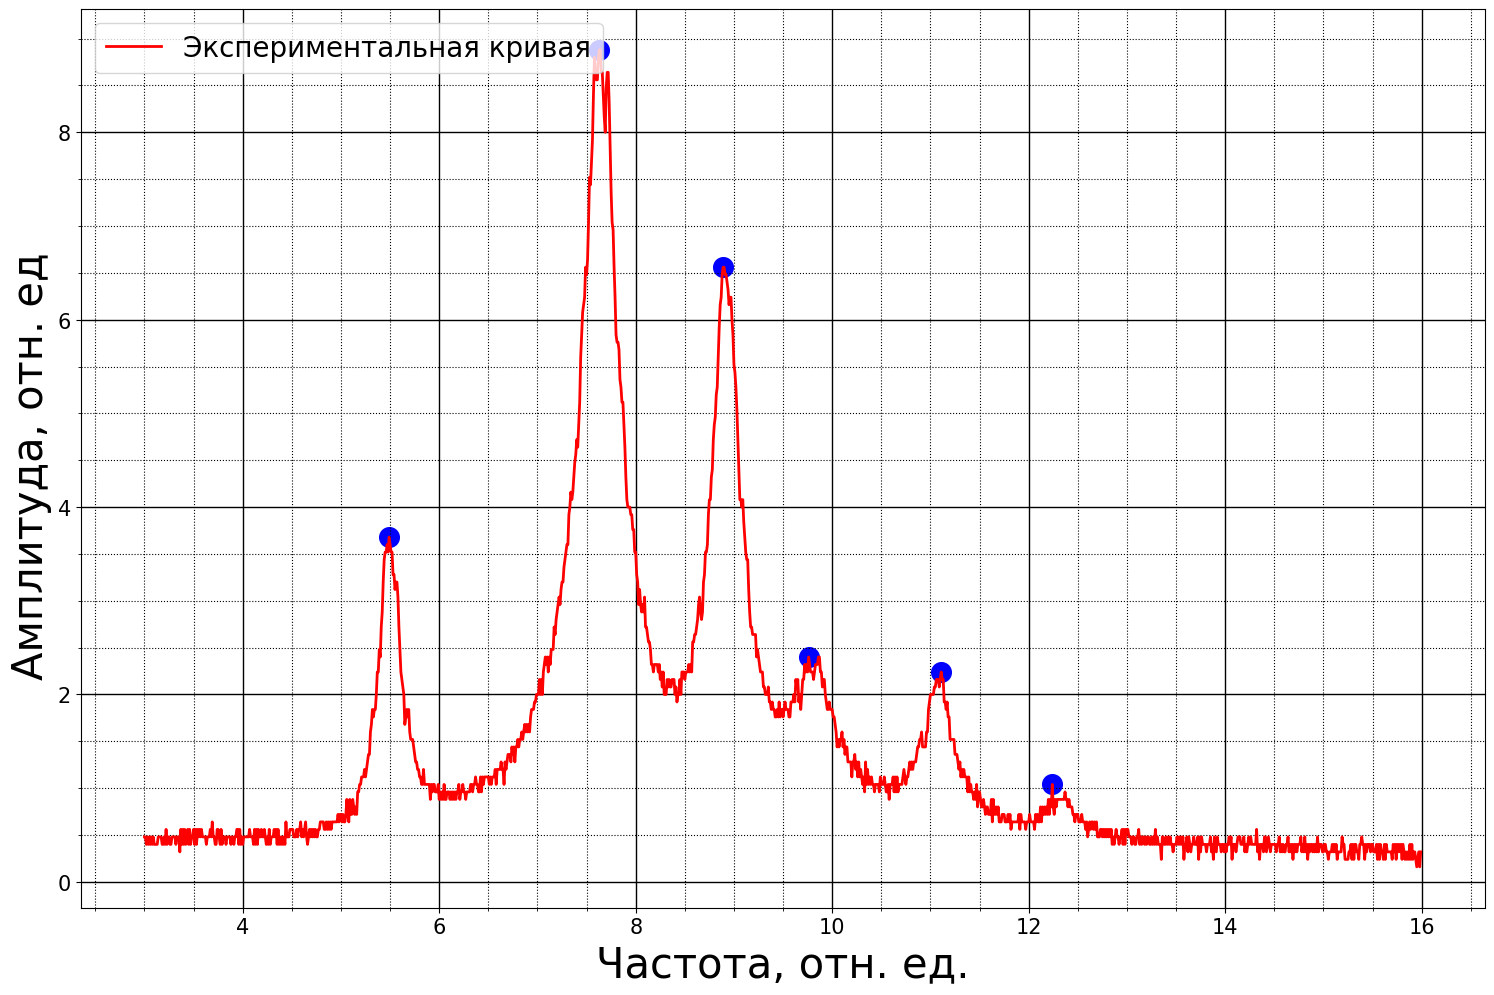

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="b", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03
# ax.set_ylim(np.min(amp[peaks_idx]) - np.min(amp[peaks_idx]) * 0.1)
# ax.text(time[peaks_idx][0], amp[peaks_idx][0] + shift,  "2-3", fontsize=20)
# ax.text(time[peaks_idx][1], amp[peaks_idx][1] + shift,  "2-2,3", fontsize=20)
# ax.text(time[peaks_idx][2], amp[peaks_idx][2] + shift,  "2-1,3", fontsize=20)
# ax.text(time[peaks_idx][3], amp[peaks_idx][3] + shift,  "2-2", fontsize=20)
# ax.text(time[peaks_idx][4], amp[peaks_idx][4] + shift,  "2-1,2", fontsize=20)
# ax.text(time[peaks_idx][5], amp[peaks_idx][5] + shift,  "2-1", fontsize=20)

После чего можно построить и нормальный график  с подписями пиков 

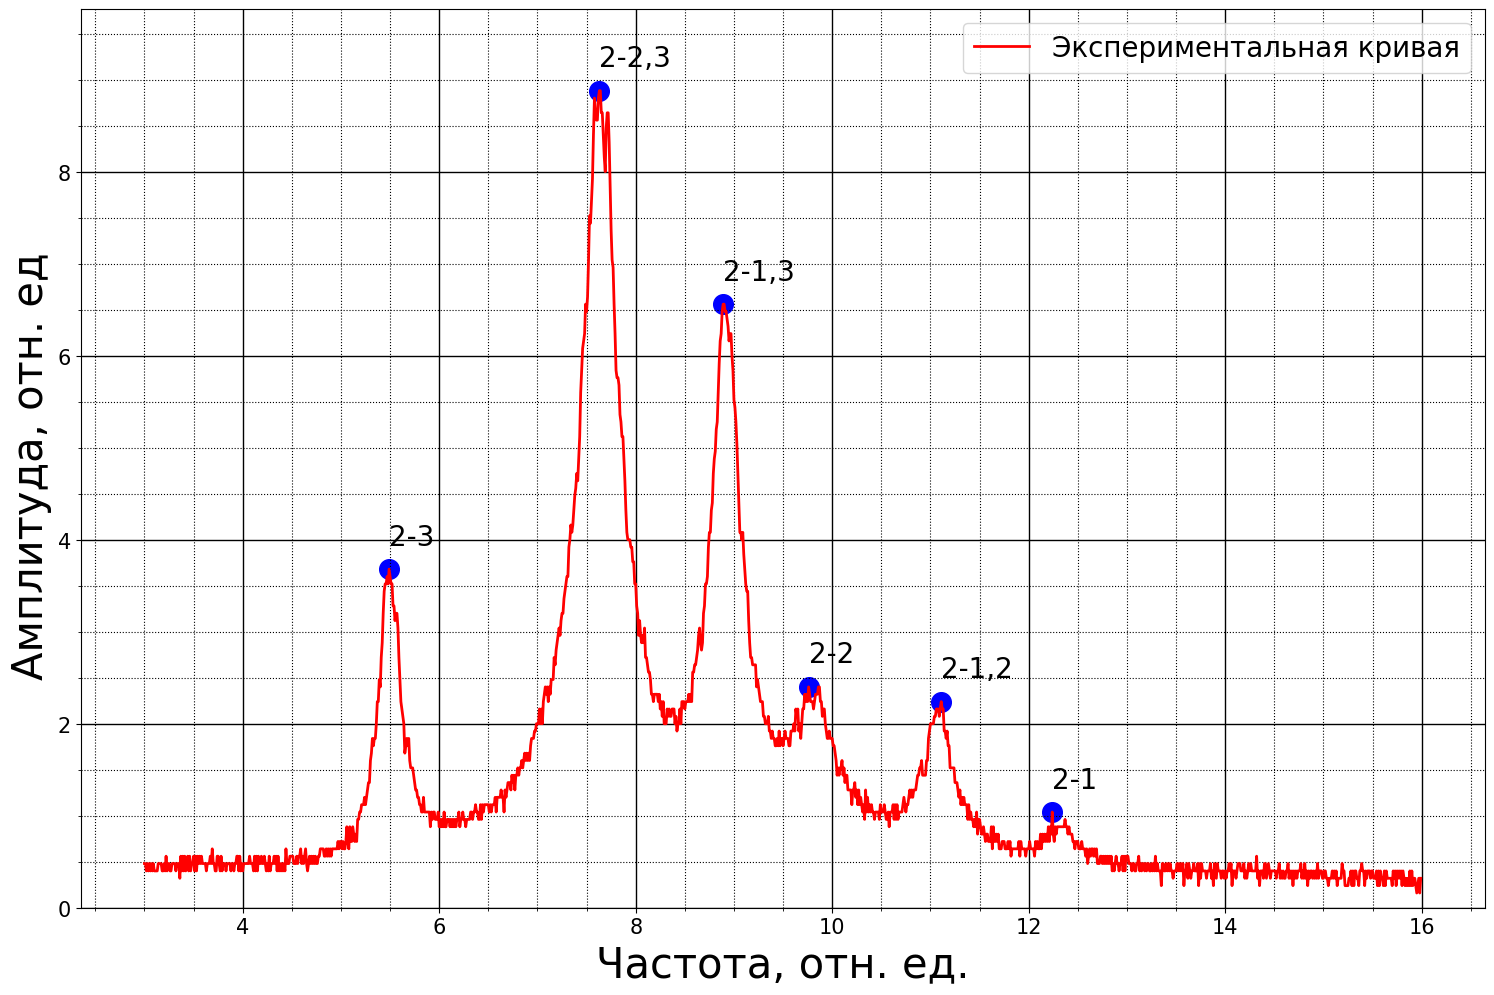

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'r',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="b", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper right')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03
ax.set_ylim(bottom =0, top = np.max(amp[peaks_idx]) + np.max(amp[peaks_idx]) * 0.1)
ax.text(time[peaks_idx][0], amp[peaks_idx][0] + shift,  "2-3", fontsize=20)
ax.text(time[peaks_idx][1], amp[peaks_idx][1] + shift,  "2-2,3", fontsize=20)
ax.text(time[peaks_idx][2], amp[peaks_idx][2] + shift,  "2-1,3", fontsize=20)
ax.text(time[peaks_idx][3], amp[peaks_idx][3] + shift,  "2-2", fontsize=20)
ax.text(time[peaks_idx][4], amp[peaks_idx][4] + shift,  "2-1,2", fontsize=20)
ax.text(time[peaks_idx][5], amp[peaks_idx][5] + shift,  "2-1", fontsize=20)
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_4_1.png'))

In [22]:
print("Ширина пика резонанса на полувысоте 2-3 = ",p_wds[0]) 
print("Ширина пика резонанса на полувысоте 2-2,3 = ",p_wds[1]) 
print("Ширина пика резонанса на полувысоте 2-1,3 = ",p_wds[2]) 
print("Ширина пика резонанса на полувысоте 2-2 = ",p_wds[3]) 
print("Ширина пика резонанса на полувысоте 2-1,2 = ",p_wds[4]) 
print("Ширина пика резонанса на полувысоте 2-1 = ",p_wds[5]) 

Ширина пика резонанса на полувысоте 2-3 =  22.666666666666657
Ширина пика резонанса на полувысоте 2-2,3 =  49.875
Ширина пика резонанса на полувысоте 2-1,3 =  28.83333333333337
Ширина пика резонанса на полувысоте 2-2 =  20.5
Ширина пика резонанса на полувысоте 2-1,2 =  24.08333333333337
Ширина пика резонанса на полувысоте 2-1 =  2.0


Аналогичную процедуру проделаем и для других фильтров 

In [23]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f4.CSV'))
time =  data.iloc[:, 3].to_numpy()
time = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

In [24]:
print(len(time))
time = time[300:1600]*1e+3
amp = amp[300:1600]*1e+2

2499


In [25]:
peaks_idx, prop = find_peaks(amp,  prominence=0.32, distance=70)
p_wds, wds_hights,left_ips, right_ips = peak_widths(amp, peaks_idx, rel_height=0.5)

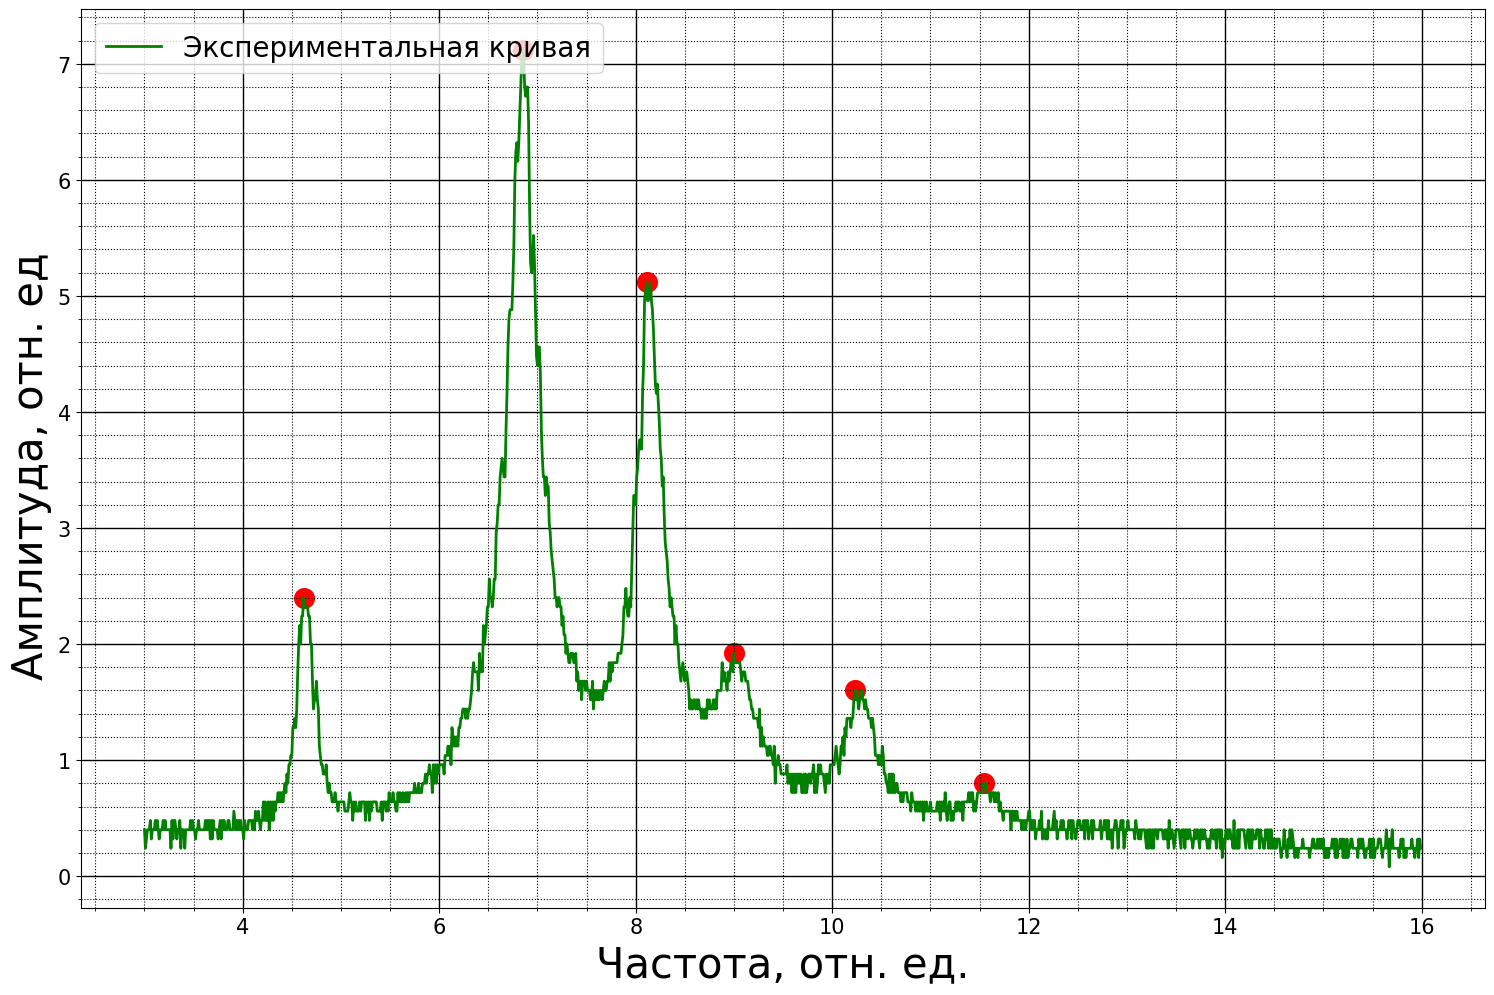

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'g',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="r", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03

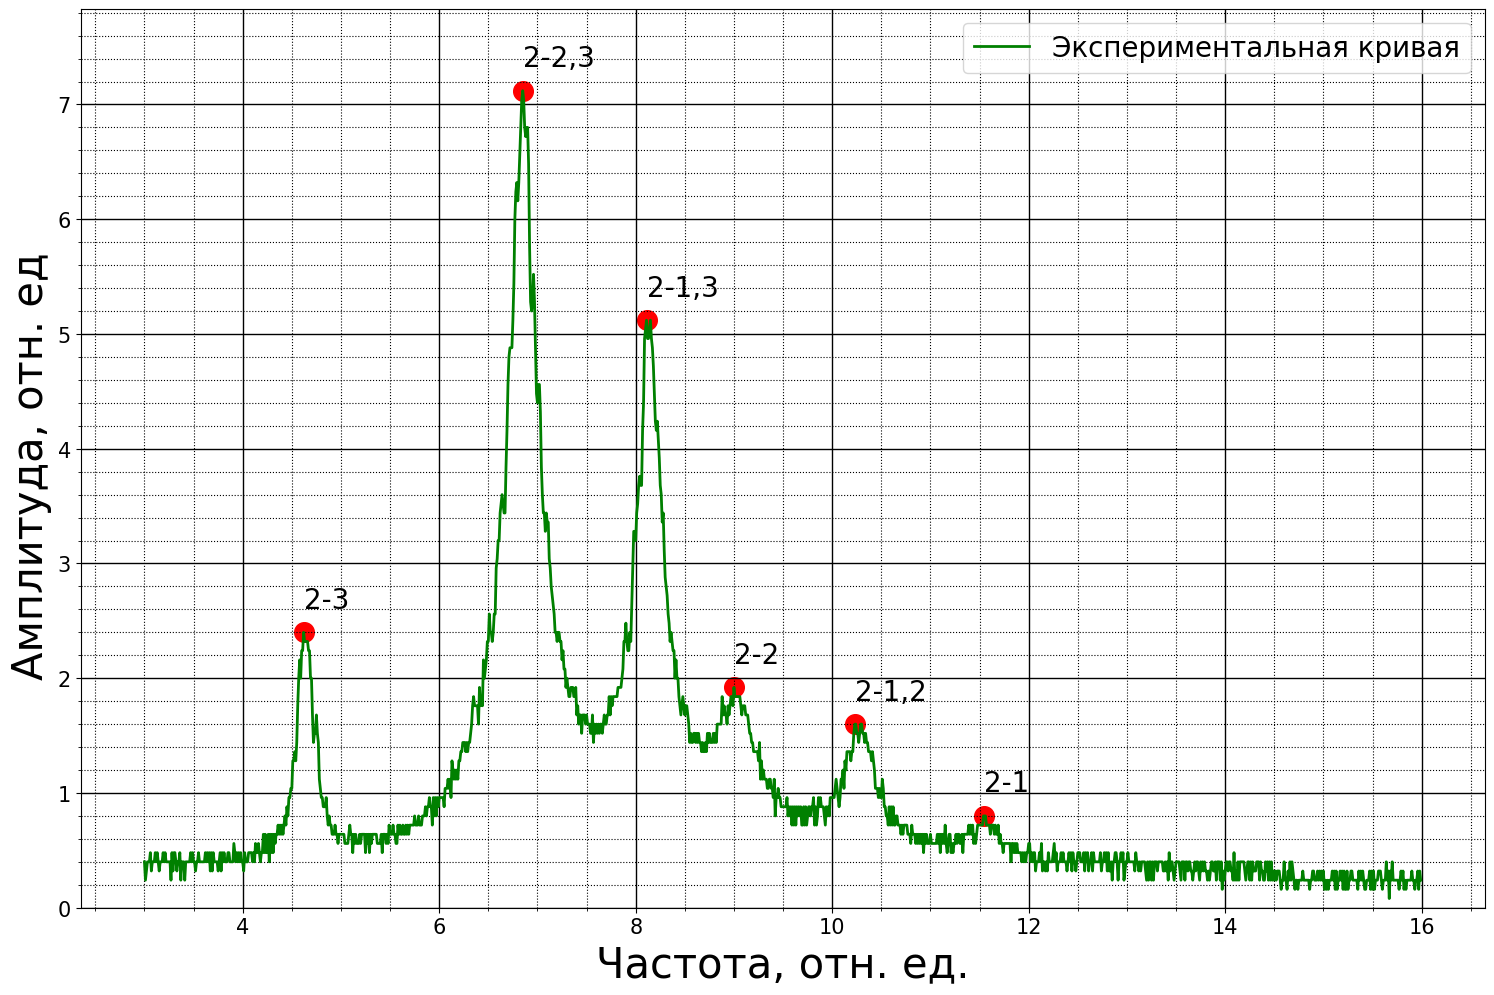

In [27]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'g',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="r", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper right')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03
ax.set_ylim(bottom =0, top = np.max(amp[peaks_idx]) + np.max(amp[peaks_idx]) * 0.1)
ax.text(time[peaks_idx][0], amp[peaks_idx][0] + shift,  "2-3", fontsize=20)
ax.text(time[peaks_idx][1], amp[peaks_idx][1] + shift,  "2-2,3", fontsize=20)
ax.text(time[peaks_idx][2], amp[peaks_idx][2] + shift,  "2-1,3", fontsize=20)
ax.text(time[peaks_idx][3], amp[peaks_idx][3] + shift,  "2-2", fontsize=20)
ax.text(time[peaks_idx][4], amp[peaks_idx][4] + shift,  "2-1,2", fontsize=20)
ax.text(time[peaks_idx][5], amp[peaks_idx][5] + shift,  "2-1", fontsize=20)
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_4_2.png'))

In [28]:
print("Ширина пика резонанса на полувысоте 2-3 = ",p_wds[0]) 
print("Ширина пика резонанса на полувысоте 2-2,3 = ",p_wds[1]) 
print("Ширина пика резонанса на полувысоте 2-1,3 = ",p_wds[2]) 
print("Ширина пика резонанса на полувысоте 2-2 = ",p_wds[3]) 
print("Ширина пика резонанса на полувысоте 2-1,2 = ",p_wds[4]) 
print("Ширина пика резонанса на полувысоте 2-1 = ",p_wds[5]) 

Ширина пика резонанса на полувысоте 2-3 =  17.0
Ширина пика резонанса на полувысоте 2-2,3 =  37.06666666666666
Ширина пика резонанса на полувысоте 2-1,3 =  28.166666666666686
Ширина пика резонанса на полувысоте 2-2 =  21.25
Ширина пика резонанса на полувысоте 2-1,2 =  30.75
Ширина пика резонанса на полувысоте 2-1 =  14.0


 и с ещё одним фильтром? Важно отметить, что в данном случае порядок следования пиков изменился 

In [29]:
data = pd.read_csv(os.path.join(sys.path[0]+'/data/f5.CSV'))
time =  data.iloc[:, 3].to_numpy()
time = freq - np.min(freq)
amp = data.iloc[:,4].to_numpy()

In [30]:
print(len(time))
time = time[700:1900]*1e+3
amp = amp[700:1900]*1e+2

2499


In [31]:
peaks_idx, prop = find_peaks(amp,  prominence=0.35, distance=70)
p_wds, wds_hights,left_ips, right_ips = peak_widths(amp, peaks_idx, rel_height=0.5)

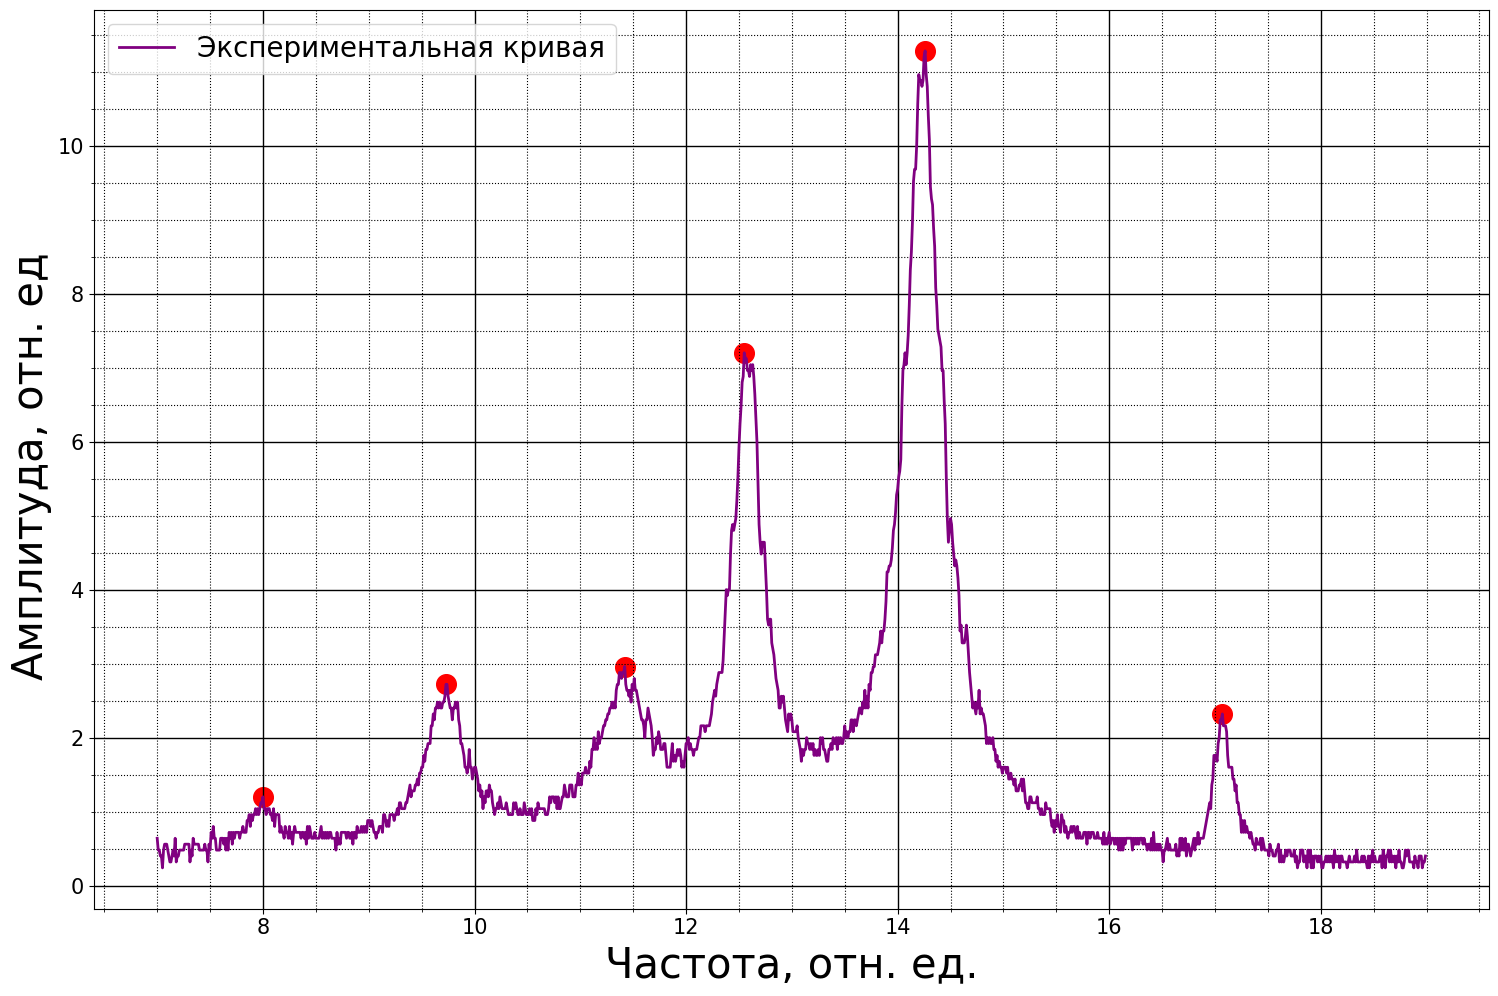

In [32]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'purple',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="r", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03

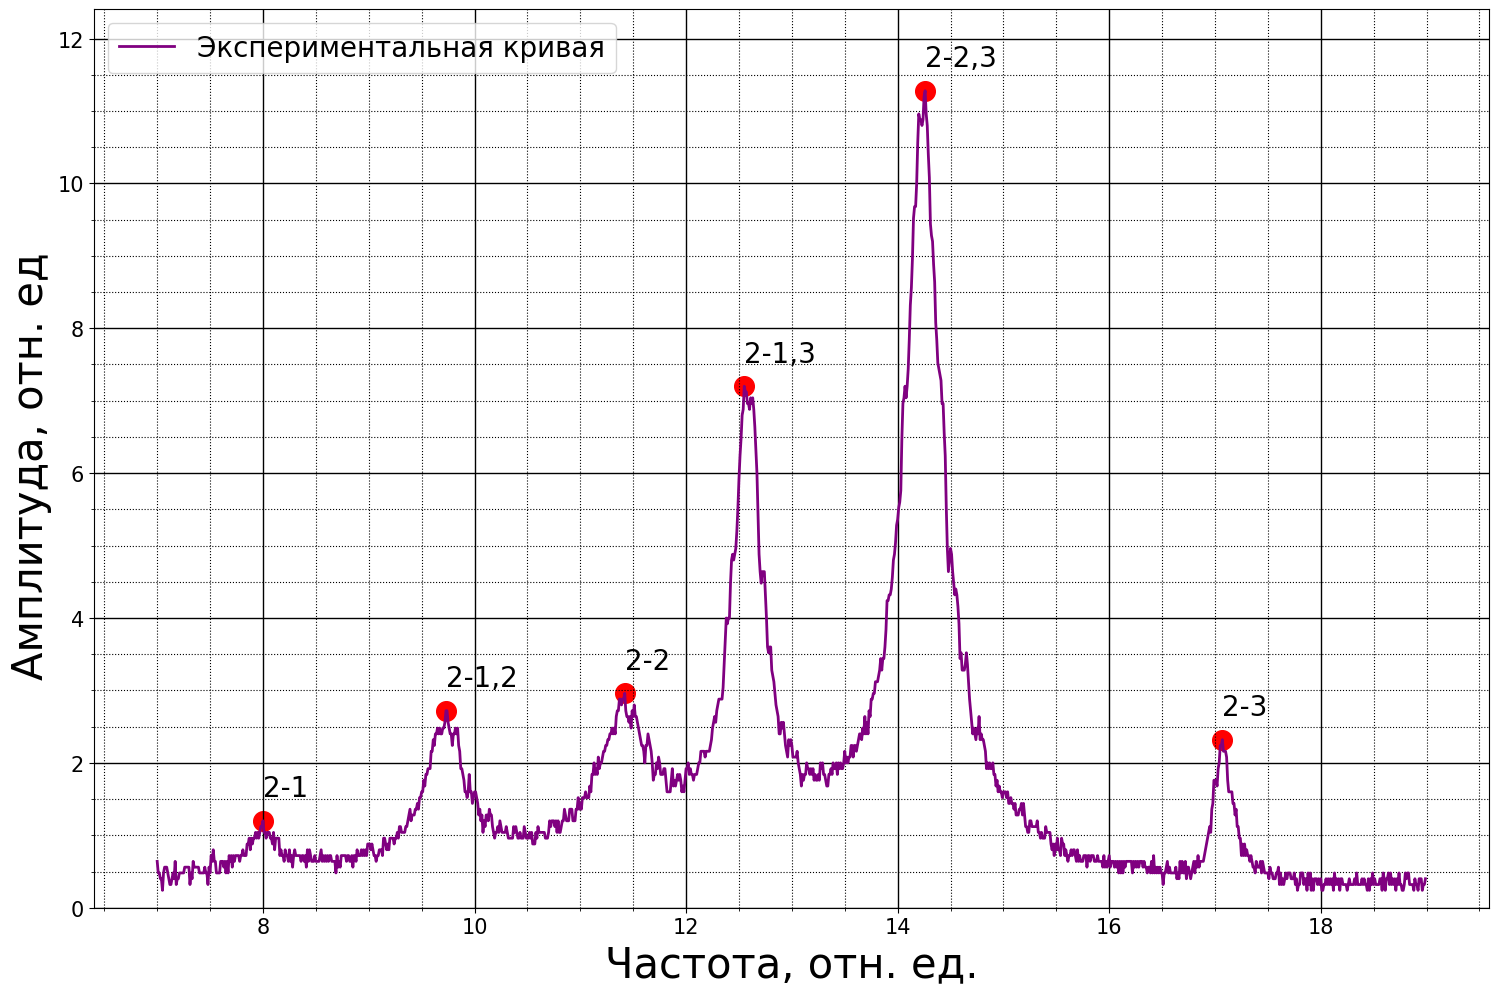

In [33]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(time,  amp, c = 'purple',linewidth=width, label="Экспериментальная кривая") 

ax.scatter( time[peaks_idx],
            amp[peaks_idx],
            color="r", s=200, marker='o' 
            )

ax.set_xlabel('Частота, отн. ед.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Амплитуда, отн. ед ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
shift = np.max(amp[peaks_idx]) * 0.03
ax.set_ylim(bottom =0, top = np.max(amp[peaks_idx]) + np.max(amp[peaks_idx]) * 0.1)
ax.text(time[peaks_idx][0], amp[peaks_idx][0] + shift,  "2-1", fontsize=20)
ax.text(time[peaks_idx][1], amp[peaks_idx][1] + shift,  "2-1,2", fontsize=20)
ax.text(time[peaks_idx][2], amp[peaks_idx][2] + shift,  "2-2", fontsize=20)
ax.text(time[peaks_idx][3], amp[peaks_idx][3] + shift,  "2-1,3", fontsize=20)
ax.text(time[peaks_idx][4], amp[peaks_idx][4] + shift,  "2-2,3", fontsize=20)
ax.text(time[peaks_idx][5], amp[peaks_idx][5] + shift,  "2-3", fontsize=20)
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_4_3.png'))

In [34]:
print("Ширина пика резонанса на полувысоте 2-3 = ",p_wds[5]) 
print("Ширина пика резонанса на полувысоте 2-2,3 = ",p_wds[4]) 
print("Ширина пика резонанса на полувысоте 2-1,3 = ",p_wds[3]) 
print("Ширина пика резонанса на полувысоте 2-2 = ",p_wds[2]) 
print("Ширина пика резонанса на полувысоте 2-1,2 = ",p_wds[1]) 
print("Ширина пика резонанса на полувысоте 2-1 = ",p_wds[0]) 

Ширина пика резонанса на полувысоте 2-3 =  21.875
Ширина пика резонанса на полувысоте 2-2,3 =  42.66666666666663
Ширина пика резонанса на полувысоте 2-1,3 =  32.70833333333337
Ширина пика резонанса на полувысоте 2-2 =  32.0
Ширина пика резонанса на полувысоте 2-1,2 =  35.75
Ширина пика резонанса на полувысоте 2-1 =  22.58333333333333
